In [21]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2
from pprint import pprint

In [22]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'be1e592c5fd4470a8dd365c42b1c4e0b' }).json()
        return json['standing']
    except:
        pprint(json)
        return None

In [23]:
teams = call_api('http://api.football-data.org/v1/competitions/426/leagueTable', 'leagueTable')
teams

[{'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/61'}},
  'away': {'draws': 3,
   'goals': 30,
   'goalsAgainst': 16,
   'losses': 3,
   'wins': 13},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/de/5/5c/Chelsea_crest.svg',
  'draws': 3,
  'goalDifference': 52,
  'goals': 85,
  'goalsAgainst': 33,
  'home': {'draws': 0,
   'goals': 55,
   'goalsAgainst': 17,
   'losses': 2,
   'wins': 17},
  'losses': 5,
  'playedGames': 38,
  'points': 93,
  'position': 1,
  'teamName': 'Chelsea FC',
  'wins': 30},
 {'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/73'}},
  'away': {'draws': 6,
   'goals': 39,
   'goalsAgainst': 17,
   'losses': 4,
   'wins': 9},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/de/b/b4/Tottenham_Hotspur.svg',
  'draws': 8,
  'goalDifference': 60,
  'goals': 86,
  'goalsAgainst': 26,
  'home': {'draws': 2,
   'goals': 47,
   'goalsAgainst': 9,
   'losses': 0,
   'wins': 17},
  'losses': 4,
  'playedGames': 38,
  'points'

In [24]:
values = [631.9, 551.0, 629.5, 514.5, 508.0, 592.75, 335.25, 255.60, 116.75, 156.25, 215.90, 243.50, 160.25, 190.60, 154.10, 91.5, 150.0, 70.30, 86.8, 62.75]
squads_for_pd = []
# # losses = []
for i in range(len(teams)):
    squads_for_pd.append({'name': teams[i]["teamName"], 'value': values[i], 'losses': teams[i]["losses"]})
pprint(squads_for_pd)



[{'losses': 5, 'name': 'Chelsea FC', 'value': 631.9},
 {'losses': 4, 'name': 'Tottenham Hotspur FC', 'value': 551.0},
 {'losses': 6, 'name': 'Manchester City FC', 'value': 629.5},
 {'losses': 6, 'name': 'Liverpool FC', 'value': 514.5},
 {'losses': 9, 'name': 'Arsenal FC', 'value': 508.0},
 {'losses': 5, 'name': 'Manchester United FC', 'value': 592.75},
 {'losses': 11, 'name': 'Everton FC', 'value': 335.25},
 {'losses': 16, 'name': 'Southampton FC', 'value': 255.6},
 {'losses': 16, 'name': 'AFC Bournemouth', 'value': 116.75},
 {'losses': 17, 'name': 'West Bromwich Albion FC', 'value': 156.25},
 {'losses': 17, 'name': 'West Ham United FC', 'value': 215.9},
 {'losses': 18, 'name': 'Leicester City FC', 'value': 243.5},
 {'losses': 16, 'name': 'Stoke City FC', 'value': 160.25},
 {'losses': 21, 'name': 'Crystal Palace FC', 'value': 190.6},
 {'losses': 21, 'name': 'Swansea City FC', 'value': 154.1},
 {'losses': 20, 'name': 'Burnley FC', 'value': 91.5},
 {'losses': 20, 'name': 'Watford FC', 'v

In [25]:
squads_pd = pd.DataFrame(squads_for_pd)
squads_pd

,losses,name,value
0,5,Chelsea FC,631.90
1,4,Tottenham Hotspur FC,551.00
2,6,Manchester City FC,629.50
3,6,Liverpool FC,514.50
4,9,Arsenal FC,508.00
5,5,Manchester United FC,592.75
6,11,Everton FC,335.25
7,16,Southampton FC,255.60
8,16,AFC Bournemouth,116.75
9,17,West Bromwich Albion FC,156.25


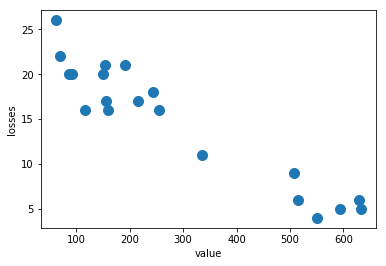

In [29]:
squads_pd.plot.scatter(x='value', y='losses', s=100)
plt.show()

In [8]:
del squads_pd['name']
squads_pd


,losses,value
0,5,631.90
1,4,551.00
2,6,629.50
3,6,514.50
4,9,508.00
5,5,592.75
6,11,335.25
7,16,255.60
8,16,116.75
9,17,156.25


In [9]:
whitened = whiten(squads_pd.as_matrix())
whitened


array([[ 0.75757576,  3.17203075],
       [ 0.60606061,  2.76592648],
       [ 0.90909091,  3.15998316],
       [ 0.90909091,  2.58270268],
       [ 1.36363636,  2.55007378],
       [ 0.75757576,  2.9755044 ],
       [ 1.66666667,  1.6828981 ],
       [ 2.42424242,  1.28306862],
       [ 2.42424242,  0.58606519],
       [ 2.57575758,  0.78434848],
       [ 2.57575758,  1.08378136],
       [ 2.72727273,  1.22232867],
       [ 2.42424242,  0.8044278 ],
       [ 3.18181818,  0.95677965],
       [ 3.18181818,  0.77355585],
       [ 3.03030303,  0.45931447],
       [ 3.03030303,  0.75297454],
       [ 3.33333333,  0.35289407],
       [ 3.03030303,  0.43572127],
       [ 3.93939394,  0.31499435]])

In [10]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map


(array([[ 3.24675325,  0.57803346],
        [ 2.4025974 ,  1.06384546],
        [ 0.88383838,  2.86770354]]),
 array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]))

In [12]:

colors_map = {0: 'r', 1: 'g', 2: 'b'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r']

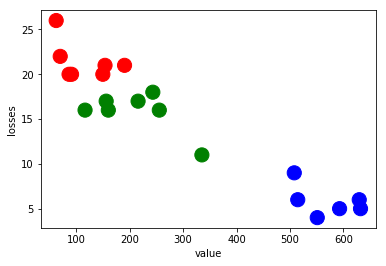

In [30]:
squads_pd.plot.scatter(x='value', y='losses', c=colors, s=200)
plt.show()

In [32]:
centroids, cluster_map = kmeans2(whitened, 4)
centroids, cluster_map

(array([[ 1.51515152,  2.11648594],
        [ 3.24675325,  0.57803346],
        [ 0.78787879,  2.9312295 ],
        [ 2.52525253,  0.96067002]]),
 array([2, 2, 2, 2, 0, 2, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1]))

In [39]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'r',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g']

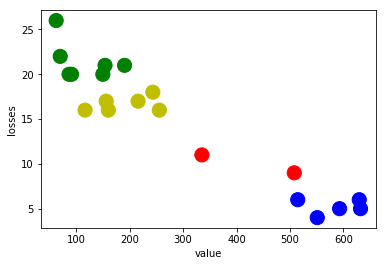

In [42]:
squads_pd.plot.scatter(x='value', y='losses', c=colors, s=200)
plt.show()